In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

# Setup matplotlib style using mplhep
extra_styling = {
    "text.usetex": True,
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "axes.xmargin": 0
}
plt.style.use([hep.style.ROOT, extra_styling])

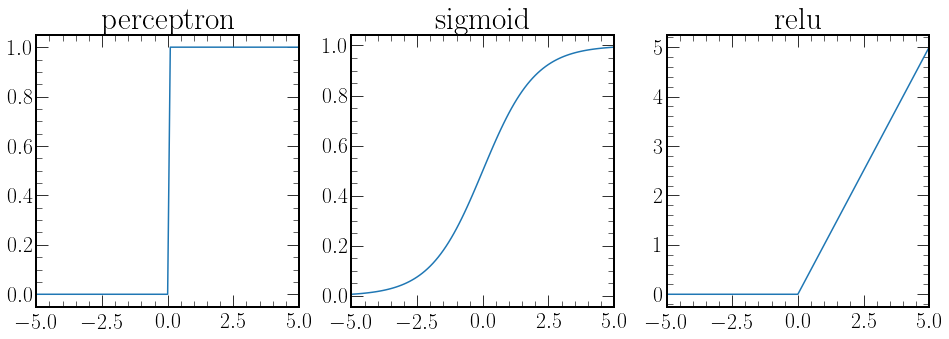

In [28]:
def perceptron(x):
    if x > 0:
        return 1
    else:
        return 0
    
def sigmoid(x):
    return 1/(1+math.exp(-x))

def relu(x):
    if x > 0:
        return float(x)
    else:
        return 0
    
x = np.arange(-5.0, 5.1, 0.1)
perceptron_vec = np.vectorize(perceptron, otypes=[np.float64])
perceptron_result = perceptron_vec(x)
sigmoid_vec = np.vectorize(sigmoid, otypes=[np.float64])
sigmoid_result = sigmoid_vec(x)
relu_vec = np.vectorize(relu, otypes=[np.float64])
relu_result = relu_vec(x)

fig, axs = plt.subplots(1, 3, figsize=(16, 5), gridspec_kw={"hspace": 0.3})
axs[0].plot(x, perceptron_result)
axs[0].set_title("perceptron")
axs[1].plot(x, sigmoid_result)
axs[1].set_title("sigmoid")
axs[2].plot(x, relu_result)
axs[2].set_title("relu")
plt.savefig("../diagrams/6-cvn/activations.pgf")
plt.savefig("../diagrams/6-cvn/activations.pdf")
plt.show()

In [ ]:
with utils.CHIPSStyle():
    weights_file = open("./output/weights.txt", "r")
    nuel_w = float(weights_file.readline())
    anuel_w = float(weights_file.readline())
    numu_w = float(weights_file.readline())
    anumu_w = float(weights_file.readline())
    total = float(weights_file.readline())
    weights_file.close()
    print("nuel: {}, anuel: {}, numu: {}, anumu:{}, total: {}".format(
        nuel_w, anuel_w, numu_w, anumu_w, total
    ))

    nuel_file = ROOT.TFile("./data/events_nuel.root")
    anuel_file = ROOT.TFile("./data/events_anuel.root")
    numu_file = ROOT.TFile("./data/events_numu.root")
    anumu_file = ROOT.TFile("./data/events_anumu.root")

    nuel_t_all_h = nuel_file.Get("int_types_all")
    anuel_t_all_h = anuel_file.Get("int_types_all")
    numu_t_all_h = numu_file.Get("int_types_all")
    anumu_t_all_h = anumu_file.Get("int_types_all")

    nuel_t_passed_h = nuel_file.Get("int_types_passed")
    anuel_t_passed_h = anuel_file.Get("int_types_passed")
    numu_t_passed_h = numu_file.Get("int_types_passed")
    anumu_t_passed_h = anumu_file.Get("int_types_passed")

    nuel_t_passed_h.Divide(nuel_t_all_h)
    anuel_t_passed_h.Divide(anuel_t_all_h)
    numu_t_passed_h.Divide(numu_t_all_h)
    anumu_t_passed_h.Divide(anumu_t_all_h)

    nuel_num = nuel_t_all_h.GetEntries()
    anuel_num = anuel_t_all_h.GetEntries()
    numu_num = numu_t_all_h.GetEntries()
    anumu_num = anumu_t_all_h.GetEntries()
    total_num = (nuel_w*float(nuel_num)) + (anuel_w*float(anuel_num)) + (numu_w*float(numu_num)) + (anumu_w*float(anumu_num))
    event_scale = total/total_num
    print("Entries total: {}, total: {}, scale: {}".format(total_num, total, event_scale))

    nuel_t_all_h.SetFillColor(ROOT.kGreen+1)
    nuel_t_all_h.SetTitle("#nu_{e}")
    nuel_t_all_h.Scale(nuel_w)
    nuel_t_all_h.Scale(event_scale)
    anuel_t_all_h.SetFillColor(ROOT.kGreen+2)
    anuel_t_all_h.SetTitle("#bar{#nu}_{e}")
    anuel_t_all_h.Scale(anuel_w)
    anuel_t_all_h.Scale(event_scale)
    numu_t_all_h.SetFillColor(ROOT.kBlue+1)
    numu_t_all_h.SetTitle("#nu_{#mu}")
    numu_t_all_h.Scale(numu_w)
    numu_t_all_h.Scale(event_scale)
    anumu_t_all_h.SetFillColor(ROOT.kBlue+2)
    anumu_t_all_h.SetTitle("#bar{#nu}_{#mu}")
    anumu_t_all_h.Scale(anumu_w)
    anumu_t_all_h.Scale(event_scale)

    hists_t = [nuel_t_all_h, anuel_t_all_h, numu_t_all_h, anumu_t_all_h]
    utils.plot(hists_t, "; Interaction Type Code; Number of Events/6#times10^{20}POT/kt", "./output/events_types.png",
               0, 28, 0.1, 200, opt="sameHIST", leg_opt='FB', stack=True, log_y=True)


    # Make stacked int type energy plot
    int_types = 27
    int_names = [
        "CCQE", "NCQE",
        "CCNuPtoLPPiPlus", "CCNuNtoLPPiZero", "CCNuNtoLNPiPlus", 
        "NCNuPtoNuPPiZero", "NCNuPtoNuNPiPlus", "NCNuNtoNuNPiZero", "NCNuNtoNuPPiMinus", 
        "CCNuBarNtoLNPiMinus", "CCNuBarPtoLNPiZero", "CCNuBarPtoLPPiMinus",
        "NCNuBarPtoNuBarPPiZero", "NCNuBarPtoNuBarNPiPlus", "NCNuBarNtoNuBarNPiZero", "NCNuBarNtoNuBarPPiMinus",
        "OtherResonant", "CCMEC", "NCMEC", "IMD",
        "CCDIS", "NCDIS", "NCCoh", "CCCoh", "ElasticScattering", "InverseMuDecay",
        "CosmicMuon"
    ]

    name_e = "h_nuEnergy_"
    ccqel_e = numu_file.Get(name_e + "CCQE")
    ccmec_e = numu_file.Get(name_e + "kCCMEC")
    onepi_e = numu_file.Get(name_e + "CCNuPtoLPPiPlus")
    onepi_e.Add(numu_file.Get(name_e + "CCNuNtoLPPiZero"))
    onepi_e.Add(numu_file.Get(name_e + "CCNuNtoLNPiPlus"))
    cccoh_e = numu_file.Get(name_e + "CCCoh")
    ccdis_e = numu_file.Get(name_e + "CCDIS")
    ccother_e = numu_file.Get(name_e + "kOtherResonant")
    nc_e = numu_file.Get(name_e + "NCQE")
    nc_e.Add(numu_file.Get(name_e + "NCNuPtoNuPPiZero"))
    nc_e.Add(numu_file.Get(name_e + "NCNuPtoNuNPiPlus"))
    nc_e.Add(numu_file.Get(name_e + "NCNuNtoNuNPiZero"))
    nc_e.Add(numu_file.Get(name_e + "NCNuNtoNuPPiMinus"))
    nc_e.Add(numu_file.Get(name_e + "kNCMEC"))
    nc_e.Add(numu_file.Get(name_e + "NCDIS"))
    nc_e.Add(numu_file.Get(name_e + "NCCoh"))
    anumu_e = anumu_file.Get("h_nuEnergy_Other")
    nuel_e = nuel_file.Get("h_nuEnergy_Other")
    anuel_e = anuel_file.Get("h_nuEnergy_Other")
    for i in range(int_types):
        name_e = "h_nuEnergy_"
        name_e += int_names[i]
        anumu_e.Add(anumu_file.Get(name_e))
        nuel_e.Add(nuel_file.Get(name_e))
        anuel_e.Add(anuel_file.Get(name_e))

    ccqel_e.Rebin(2) 
    ccqel_e.SetFillColor(2) 
    ccqel_e.SetTitle("CCQE") 
    ccmec_e.Rebin(2) 
    ccmec_e.SetFillColor(3) 
    ccmec_e.SetTitle("CCMEC")
    onepi_e.Rebin(2) 
    onepi_e.SetFillColor(4) 
    onepi_e.SetTitle("CC1#pi")
    cccoh_e.Rebin(2) 
    cccoh_e.SetFillColor(5) 
    cccoh_e.SetTitle("CCCoh")
    ccdis_e.Rebin(2) 
    ccdis_e.SetFillColor(6) 
    ccdis_e.SetTitle("CCDIS")
    ccother_e.Rebin(2) 
    ccother_e.SetFillColor(7) 
    ccother_e.SetTitle("CCother")
    nc_e.Rebin(2) 
    nc_e.SetFillColor(8) 
    nc_e.SetTitle("NC")  
    anumu_e.Rebin(2) 
    anumu_e.SetFillColor(9) 
    anumu_e.SetTitle("#bar{#nu}_{#mu}")
    nuel_e.Rebin(2) 
    nuel_e.SetFillColor(10) 
    nuel_e.SetTitle("#nu_{e}")
    anuel_e.Rebin(2) 
    anuel_e.SetFillColor(11) 
    anuel_e.SetTitle("#bar{#nu}_{e}")

    ccqel_e.Scale(numu_w) 
    ccqel_e.Scale(event_scale)
    ccmec_e.Scale(numu_w) 
    ccmec_e.Scale(event_scale)
    onepi_e.Scale(numu_w) 
    onepi_e.Scale(event_scale)
    cccoh_e.Scale(numu_w) 
    cccoh_e.Scale(event_scale)
    ccdis_e.Scale(numu_w) 
    ccdis_e.Scale(event_scale)
    ccother_e.Scale(numu_w) 
    ccother_e.Scale(event_scale)
    nc_e.Scale(numu_w) 
    nc_e.Scale(event_scale)
    anumu_e.Scale(anumu_w) 
    anumu_e.Scale(event_scale)
    nuel_e.Scale(nuel_w) 
    nuel_e.Scale(event_scale)
    anuel_e.Scale(anuel_w) 
    anuel_e.Scale(event_scale)
    
    hists_e = [ccqel_e, ccmec_e, onepi_e, cccoh_e, ccdis_e, ccother_e, nc_e, anumu_e, nuel_e, anuel_e]
    utils.create_plot("../diagrams/cvn/events_energies.png", hists_e, ";Neutrino Energy (MeV); Number of Events/6#times10^{20}POT/kt",
                      0, 10000, 1, 50, "FB", "same PFC HIST", False, True, log_y=True)


    # Make stacked final states plot
    name_s = "h_finalStates_"
    ccqel_s = numu_file.Get(name_s + "CCQE")
    ccmec_s = numu_file.Get(name_s + "kCCMEC")
    onepi_s = numu_file.Get(name_s + "CCNuPtoLPPiPlus")
    onepi_s.Add(numu_file.Get(name_s + "CCNuNtoLPPiZero"))
    onepi_s.Add(numu_file.Get(name_s + "CCNuNtoLNPiPlus"))
    cccoh_s = numu_file.Get(name_s + "CCCoh")
    ccdis_s = numu_file.Get(name_s + "CCDIS")
    ccother_s = numu_file.Get(name_s + "kOtherResonant")
    nc_s = numu_file.Get(name_s + "NCQE")
    nc_s.Add(numu_file.Get(name_s + "NCNuPtoNuPPiZero"))
    nc_s.Add(numu_file.Get(name_s + "NCNuPtoNuNPiPlus"))
    nc_s.Add(numu_file.Get(name_s + "NCNuNtoNuNPiZero"))
    nc_s.Add(numu_file.Get(name_s + "NCNuNtoNuPPiMinus"))
    nc_s.Add(numu_file.Get(name_s + "kNCMEC"))
    nc_s.Add(numu_file.Get(name_s + "NCDIS"))
    nc_s.Add(numu_file.Get(name_s + "NCCoh"))

    ccqel_s.SetFillColor(2) 
    ccqel_s.SetTitle("CCQE") 
    ccmec_s.SetFillColor(3) 
    ccmec_s.SetTitle("CCMEC")
    onepi_s.SetFillColor(4) 
    onepi_s.SetTitle("CC1#pi")
    cccoh_s.SetFillColor(5) 
    cccoh_s.SetTitle("CCCoh")
    ccdis_s.SetFillColor(6) 
    ccdis_s.SetTitle("CCDIS")
    ccother_s.SetFillColor(7) 
    ccother_s.SetTitle("CCother")
    nc_s.SetFillColor(8) 
    nc_s.SetTitle("NC")  

    ccqel_s.Scale(numu_w) 
    ccqel_s.Scale(event_scale)
    ccmec_s.Scale(numu_w) 
    ccmec_s.Scale(event_scale)
    onepi_s.Scale(numu_w) 
    onepi_s.Scale(event_scale)
    cccoh_s.Scale(numu_w) 
    cccoh_s.Scale(event_scale)
    ccdis_s.Scale(numu_w) 
    ccdis_s.Scale(event_scale)
    ccother_s.Scale(numu_w) 
    ccother_s.Scale(event_scale)
    nc_s.Scale(numu_w) 
    nc_s.Scale(event_scale)
    
    hists_s = [ccqel_s, ccmec_s, onepi_s, cccoh_s, ccdis_s, ccother_s, nc_s]
    utils.create_plot("../diagrams/cvn/events_states.png", hists_s, ";Final State Type Code; Number of Events/6#times10^{20}POT/kt",
                      0, 33, 0, 200, "FB", "same PFC HIST", False, True);

    nuel_file.Close()
    anuel_file.Close()
    numu_file.Close()
    anumu_file.Close()

    # Can't really do anymore until the disks are back and I can run filtering again for fix bugs
    # - None of the anti energy distributions shows
    # - I can definitely remove some of the categories we don't see
    # - Can I combine nu and anti-nu res categories together?
    # - Check anti particles are treated exactly the same
    # - Add a combined final state plot across all categories like the int type one  

In [ ]:
def Partition(C, Nx, Ny, lMargin, rMargin, bMargin, tMargin):
    if C == None:
        return
    # Setup Pad layout:
    vSpacing = 0.01
    vStep = (1. - bMargin - tMargin - (Ny - 1) * vSpacing) / Ny
    hSpacing = 0.01
    hStep = ((1. - lMargin - rMargin - (Nx - 1) * hSpacing) / Nx) * 0.88
    vposd, vposu, vmard, vmaru, vfactor = 0.0, 0.0, 0.0, 0.0, 0.0
    hposl, hposr, hmarl, hmarr, hfactor = 0.0, 0.0, 0.0, 0.0, 0.0
    for i in range(Nx):
        if i==0:
            hposl = 0.0
            hposr = lMargin + hStep
            hfactor = hposr - hposl
            hmarl = lMargin / hfactor
            hmarr = 0.0
        elif i==Nx-1:
            hposl = hposr + hSpacing
            hposr = hposl + hStep + rMargin
            hfactor = hposr - hposl
            hmarl = 0.0
            hmarr = rMargin / (hposr - hposl)
        else:
            hposl = hposr + hSpacing
            hposr = hposl + hStep
            hfactor = hposr - hposl
            hmarl = 0.0
            hmarr = 0.0

        for j in range(Ny):
            if j==0:
                vposd = 0.0
                vposu = bMargin + vStep
                vfactor = vposu - vposd
                vmard = bMargin / vfactor
                vmaru = 0.0
            elif j==Ny-1:
                vposd = vposu + vSpacing
                vposu = vposd + vStep + tMargin
                vfactor = vposu - vposd
                vmard = 0.0
                vmaru = tMargin / (vposu - vposd)
            else:
                vposd = vposu + vSpacing
                vposu = vposd + vStep
                vfactor = vposu - vposd
                vmard = 0.0
                vmaru = 0.0
            C.cd(0)
            pad = ROOT.TPad("pad_{}_{}".format(i, j), "", hposl, vposd, hposr, vposu)
            pad.SetLeftMargin(hmarl)
            pad.SetRightMargin(hmarr)
            pad.SetBottomMargin(vmard)
            pad.SetTopMargin(vmaru)
            pad.SetFrameBorderMode(0)
            pad.SetBorderMode(0)
            pad.SetBorderSize(0)
            pad.SetLogz()
            pad.Draw()

In [ ]:
with utils.CHIPSStyle():
    el_file = ROOT.TFile("data/profile_electrons.root")
    mu_file = ROOT.TFile("data/profile_muons.root")
    pi_file = ROOT.TFile("data/profile_pions.root")
    pr_file = ROOT.TFile("data/profile_protons.root")

    el_d = el_file.Get("fRho")
    mu_d = mu_file.Get("fRho")
    pi_d = pi_file.Get("fRho")
    pr_d = pr_file.Get("fRho")

    el_d.SetLineColor(ROOT.kGreen + 1)
    el_d.SetTitle("e")
    mu_d.SetLineColor(ROOT.kRed + 1)
    mu_d.SetTitle("#mu")
    pi_d.SetLineColor(ROOT.kBlue + 1)
    pi_d.SetTitle("#pi^{#pm}")
    pr_d.SetLineColor(ROOT.kBlack)
    pr_d.SetTitle("P")

    hists = [el_d, mu_d, pi_d, pr_d]
    utils.create_plot("../diagrams/cvn/emission_distance.png", hists, "Distance (cm) Fraction of emitted photons",
                      0, 1400, 0, 0.006, "L", "same", False, False)

    ROOT.gStyle.SetOptLogz(1)

    # Get the normalised emission profiles
    el_g = el_file.Get("fGFine")
    el_g.GetXaxis().SetTitle("Cosine emission angle")
    el_g.GetYaxis().SetTitle("Distance (cm)")
    mu_g = mu_file.Get("fGFine")
    mu_g.GetXaxis().SetTitle("Cosine emission angle")
    mu_g.GetYaxis().SetTitle("Distance (cm)")
    pi_g = pi_file.Get("fGFine")
    pi_g.GetXaxis().SetTitle("Cosine emission angle")
    pi_g.GetYaxis().SetTitle("Distance (cm)")
    pr_g = pr_file.Get("fGFine")
    pr_g.GetXaxis().SetTitle("Cosine emission angle")
    pr_g.GetYaxis().SetTitle("Distance (cm)")

    profile_c = ROOT.TCanvas("profile_c", "profile_c", 1000, 800)
    profile_c.SetFillStyle(4000)
    # Number of PADS
    Nx = 2
    Ny = 2
    # Margins
    lMargin = 0.1
    rMargin = 0.02
    bMargin = 0.1
    tMargin = 0.05
    # Canvas setup
    Partition(profile_c, Nx, Ny, lMargin, rMargin, bMargin, tMargin)

    TPaletteAxis *palette
    ROOT.TPad *pad[Nx][Ny]

    pad = [[]]

    for i in range(Nx):
        for j in range(Ny):
            profile_c.cd(0)
            # Get the pads previously created.
            pad[i][j] = ROOT.gROOT.FindObject("pad_{}_{}".format(i, j))
            ROOT.gPad.SetLogz()
            pad[i][j].Draw()
            pad[i][j].SetFillStyle(4000)
            pad[i][j].SetFrameFillStyle(4000)
            pad[i][j].cd()
            # Size factors
            xFactor = pad[0][0].GetAbsWNDC() / pad[i][j].GetAbsWNDC()
            yFactor = pad[0][0].GetAbsHNDC() / pad[i][j].GetAbsHNDC()
            hFrame = el_g.Clone("h_{}_{}".format(i, j))
            hFrame.Reset()
            # Format for y axis
            hFrame.GetYaxis().SetRangeUser(10, 1400)
            hFrame.GetYaxis().SetLabelFont(43)
            hFrame.GetYaxis().SetLabelSize(16)
            hFrame.GetYaxis().SetLabelOffset(0.02)
            hFrame.GetYaxis().SetTitleFont(43)
            hFrame.GetYaxis().SetTitleSize(30)
            hFrame.GetYaxis().SetTitleOffset(2.5)
            hFrame.GetYaxis().CenterTitle()
            hFrame.GetYaxis().SetNdivisions(505)
            hFrame.GetYaxis().SetTickLength(xFactor * 0.04 / yFactor)
            # Format for x axis
            hFrame.GetXaxis().SetRangeUser(0.3, 1.1)
            hFrame.GetXaxis().SetLabelFont(43)
            hFrame.GetXaxis().SetLabelSize(16)
            hFrame.GetXaxis().SetLabelOffset(0.02)
            hFrame.GetXaxis().SetTitleFont(43)
            hFrame.GetXaxis().SetTitleSize(30)
            hFrame.GetXaxis().SetTitleOffset(2.5)
            hFrame.GetXaxis().CenterTitle()
            hFrame.GetXaxis().SetNdivisions(505)
            hFrame.GetXaxis().SetTickLength(yFactor * 0.06 / xFactor)
            # Format for the z axis
            hFrame.GetZaxis().SetRangeUser(0, 0.01)

            # Draw the frame and the plot
            hFrame.Draw()
            text = ROOT.TLatex(.1, .93, "hello")

            if i==0 and j==0:
                text.SetTextSize(2.6 / 30.)
                text.DrawText(0.375, 1200, "charged pion")
                pi_g.Draw("sameCOL")
            if i==0 and j==1:
                text.SetTextSize(3 / 30.)
                text.DrawText(0.375, 1200, "electron")
                el_g.Draw("sameCOL")
            if i==1 and j==0:
                text.SetTextSize(2.6 / 30.)
                text.DrawText(0.375, 1200, "proton")
                pr_g.Draw("sameCOL")
            if i==1 and j==1:
                text.SetTextSize(3 / 30.)
                text.DrawText(0.375, 1200, "muon")
                mu_g.Draw("sameCOL")
                palette = ROOT.TPaletteAxis(0.90, 0.1, 0.93, 0.95, mu_g)

            ROOT.gPad.Update()
            ROOT.gPad.RedrawAxis()
            l = ROOT.TLine()
            l.SetLineWidth(3)
            l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymin())
            l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymax())
            l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymax(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymax())
            l.DrawLine(ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymax())

    profile_c.cd()
    palette.Draw("same")
    profile_c.SetLogz()
    profile_c.Draw()

    # Save canvas as png and root macro
    profile_c.SaveAs("../diagrams/cvn/emission_profile.png")

    el_file.Close()
    mu_file.Close()
    pi_file.Close()
    pr_file.Close()

In [ ]:
with utils.CHIPSStyle():
    root_file = ROOT.TFile("data/digi_sk1pe.root")
    raw = root_file.Get("rawDigiPDF")
    pois = root_file.Get("poissonDigiPDF_digiNorm_ln")

    raw.GetZaxis().SetLabelSize(0.3)
    raw.GetZaxis().SetLabelSize(0.03)
    raw.GetZaxis().SetLabelOffset(0)

    utils.create_plot_2d("../diagrams/cvn/digi_method.png", raw, ";Incident Photons; Digitised charge in p.e; ",
                         0, 10, 0, 10, 1e-5, 1e-2 ,"same COLZ", False, True)

    utils.create_plot_2d("../diagrams/cvn/digi_likelihood.png", pois, ";Predicted mean number of photons; Digitised charge in p.e; ",
                         0, 10, 0, 10,  5, 25, "same COLZ", False, False)

    root_file.Close()

In [ ]:
with utils.CHIPSStyle():
    root_file = ROOT.TFile("data/cvn_flux_output.root")
    tree = root_file.Get("events")

    utils.tree_hist("../diagrams/cvn/nuEnergy.png", tree, "t_nuEnergy", 
              ";Neutrino Energy (MeV); Fraction of Events", 30, 0, 15000)

    categories = 17
    for i in range(categories):
        true_cat_pred_e_h = ROOT.TH2F("true_cat_pred_e",
            "true_cat_pred_e ;True Energy (MeV); Estimated Energy (MeV)", 40, 0, 10000, 40, 0, 10000)
        pred_cat_pred_e_h = ROOT.TH2F("pred_cat_pred_e",
            "pred_cat_pred_e ;True Energy (MeV); Estimated Energy (MeV)", 40, 0, 10000, 40, 0, 10000)
        
        true_cut = "t_cat=="
        true_cut += i
        tree.Draw("t_nuEnergy:true_cat_pred_e>>true_cat_pred_e", true_cut)
        pred_cut = "classification=="
        pred_cut += i
        tree.Draw("t_nuEnergy:pred_cat_pred_e>>pred_cat_pred_e", pred_cut)

        canvas_true = ROOT.TCanvas(true_cut, true_cut, 1000, 800)
        canvas_true.SetLogz()
        true_cat_pred_e_h.Draw("COLZ")
        canvas_true.Draw()

        true_save = "../diagrams/cvn/energy_estimation/true_cat_"
        true_save += i
        true_save += ".png"
        canvas_true.SaveAs(true_save)

        canvas_pred = ROOT.TCanvas(pred_cut, pred_cut, 1000, 800)
        canvas_pred.SetLogz()
        pred_cat_pred_e_h.Draw("COLZ")
        canvas_pred.Draw()

        pred_save = "../diagrams/cvn/energy_estimation/pred_cat_"
        pred_save += i
        pred_save += ".png"
        canvas_pred.SaveAs(pred_save)

        #true_cat_frac_e_h = ROOT.TH2F("true_cat_frac_e",
        #    "true_cat_frac_e ;True Energy (MeV); Estimated Energy (MeV)", 40, 0, 10000)
        #pred_cat_frac_e_h = ROOT.TH2F("pred_cat_frac_e",
        #    "pred_cat_frac_e ;True Energy (MeV); Estimated Energy (MeV)", 40, 0, 10000)

        cat, classification = 0, 0
        true_e, true_pred_e, pred_pred_e = 0.0, 0.0, 0.0
        t_cat_b = tree.GetBranch("t_cat")
        t_cat_b.SetAddress(cat)
        t_classification_b = tree.GetBranch("t_classification")
        t_classification_b.SetAddress(classification)
        t_nuEnergy_b = tree.GetBranch("t_nuEnergy")
        t_nuEnergy_b.SetAddress(true_e)
        true_e_pred_b = tree.GetBranch("true_cat_pred_e")
        true_e_pred_b.SetAddress(true_pred_e)
        pred_e_pred_b = tree.GetBranch("pred_cat_pred_e")
        pred_e_pred_b.SetAddress(pred_pred_e)
        nevent = tree.GetEntries()

        for i in range(nevent):
            tree.GetEntry(i)

    root_file.Close()
